In [11]:
import pandas as pd

# Especifica la ruta del archivo CSV
ruta_archivo_csv = r'C:\Users\USER\Downloads\BootCamp\BaseDeDatos.xlsx.csv'

# Carga el archivo CSV
datos = pd.read_csv(ruta_archivo_csv)

# Revisa las primeras filas del DataFrame
print(datos.head())





                       Nombre   Edad     Genero  \
0               Natalia olaya   0-18   Femenino   
1  Karol Natalia olaya Robles   0-18   Femenino   
2                 Leidy rojas  18-24  Masculino   
3               Joan martinez   0-18  Masculino   
4                yiner Alexis  18-24   Femenino   

  ¿Con qué dispositivos tecnológicos te conectas regularmente?  \
0                                            Celular             
1                                             Tablet             
2                                         Computador             
3                                            Celular             
4                                            Celular             

  ¿Mayormente utilizas internet en tu vida diaria para  \
0                                            Estudio     
1                                   Compras en linea     
2                                            Estudio     
3                                            Estudio     
4     

In [12]:
print(datos.shape)  # Muestra la cantidad de filas y columnas


(2614, 13)


In [12]:
print(datos.shape)  # Muestra la cantidad de filas y columnas


(2614, 13)


In [13]:
print(datos.describe(include='all'))  # Incluye todos los tipos de datos


       Nombre   Edad     Genero  \
count    2614   2614       2614   
unique   2412      7          3   
top      Juan  18-24  Masculino   
freq       10    964       1411   

       ¿Con qué dispositivos tecnológicos te conectas regularmente?  \
count                                                2614             
unique                                                  3             
top                                               Celular             
freq                                                 2253             

       ¿Mayormente utilizas internet en tu vida diaria para  \
count                                                2614     
unique                                                  5     
top                                               Trabajo     
freq                                                 1103     

       ¿Has recibido formación formal sobre el uso de Tecnologías de la Información y Comunicaciones?  \
count                                          

In [14]:
interesados = datos[datos['¿Te gustaría recibir formación sobre las Tecnologías de la Información y Comunicaciones?'] == 'Si']
print(interesados)


               Nombre   Edad     Genero  \
2         Leidy rojas  18-24  Masculino   
4        yiner Alexis  18-24   Femenino   
7            Nazareth  25-34   Femenino   
9        Sairy correa   0-18   Femenino   
10             Brayan   0-18  Masculino   
...               ...    ...        ...   
2599          Julieth   0-18   Femenino   
2603   Cielo Restrepo  25-34   Femenino   
2610     Leidy Garcia  18-24   Femenino   
2611  Carola carrillo   0-18  Masculino   
2612            Jimmy  35-44  Masculino   

     ¿Con qué dispositivos tecnológicos te conectas regularmente?  \
2                                            Computador             
4                                               Celular             
7                                               Celular             
9                                               Celular             
10                                              Celular             
...                                                 ...             


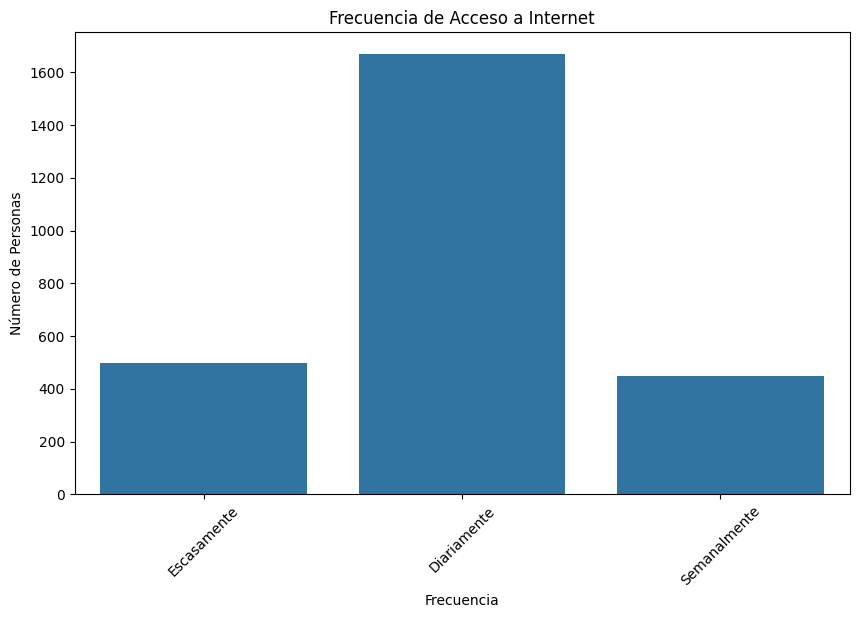

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=datos, x='¿Con qué frecuencia accedes a internet?')
plt.title('Frecuencia de Acceso a Internet')
plt.xlabel('Frecuencia')
plt.ylabel('Número de Personas')
plt.xticks(rotation=45)
plt.show()


In [18]:
datos_limpios = datos.dropna()


In [21]:
import pandas as pd

# Cargar los datos
ruta_archivo = r'C:\Users\USER\Downloads\BootCamp\BaseDeDatos.xlsx.csv'
datos = pd.read_csv(ruta_archivo)

# Verificar las primeras filas
print(datos.head())

# Función para convertir rangos de edad a un número promedio
def convertir_edad(edad):
    if '-' in edad:
        rango = edad.split('-')
        return (int(rango[0]) + int(rango[1])) / 2  # Promedio del rango
    elif edad.endswith('+'):  # Manejar casos como '65+'
        return int(edad[:-1])  # Retornar solo la parte numérica
    return int(edad)  # Si es un solo número

# Aplicar la función a la columna de edad
datos['Edad_num'] = datos['Edad'].apply(convertir_edad)

# Cálculo de medidas estadísticas para la nueva columna numérica
estadisticas = {
    'Edad': {
        'Media': datos['Edad_num'].mean(),
        'Mediana': datos['Edad_num'].median(),
        'Moda': datos['Edad_num'].mode()[0],  # Usamos mode() para obtener la moda
        'Varianza': datos['Edad_num'].var(),
        'Desviación Estándar': datos['Edad_num'].std(),
        'Percentiles': {
            '25%': datos['Edad_num'].quantile(0.25),
            '50%': datos['Edad_num'].quantile(0.50),
            '75%': datos['Edad_num'].quantile(0.75)
        }
    }
}

print(estadisticas)


                       Nombre   Edad     Genero  \
0               Natalia olaya   0-18   Femenino   
1  Karol Natalia olaya Robles   0-18   Femenino   
2                 Leidy rojas  18-24  Masculino   
3               Joan martinez   0-18  Masculino   
4                yiner Alexis  18-24   Femenino   

  ¿Con qué dispositivos tecnológicos te conectas regularmente?  \
0                                            Celular             
1                                             Tablet             
2                                         Computador             
3                                            Celular             
4                                            Celular             

  ¿Mayormente utilizas internet en tu vida diaria para  \
0                                            Estudio     
1                                   Compras en linea     
2                                            Estudio     
3                                            Estudio     
4     

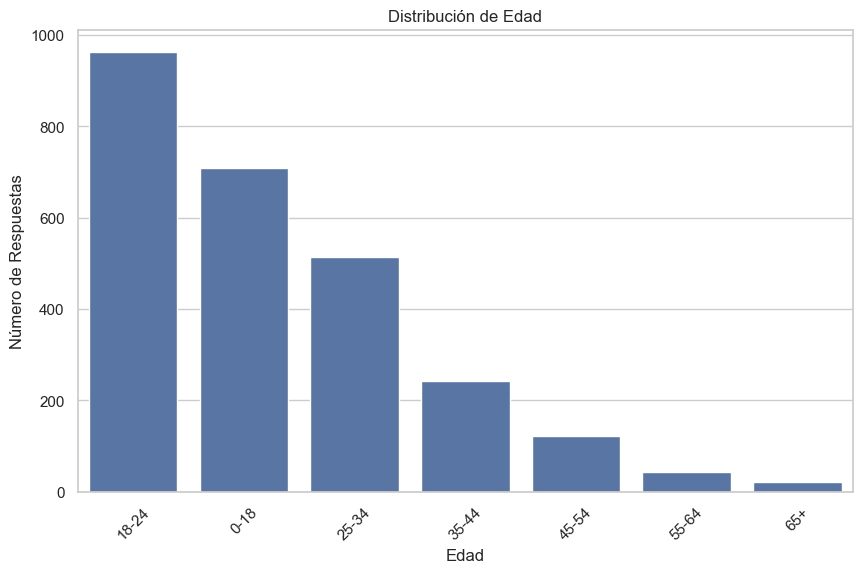

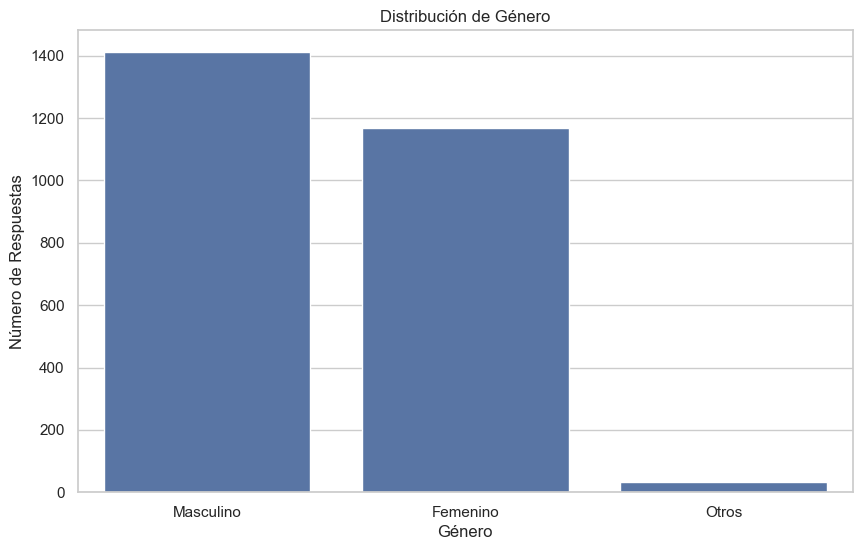

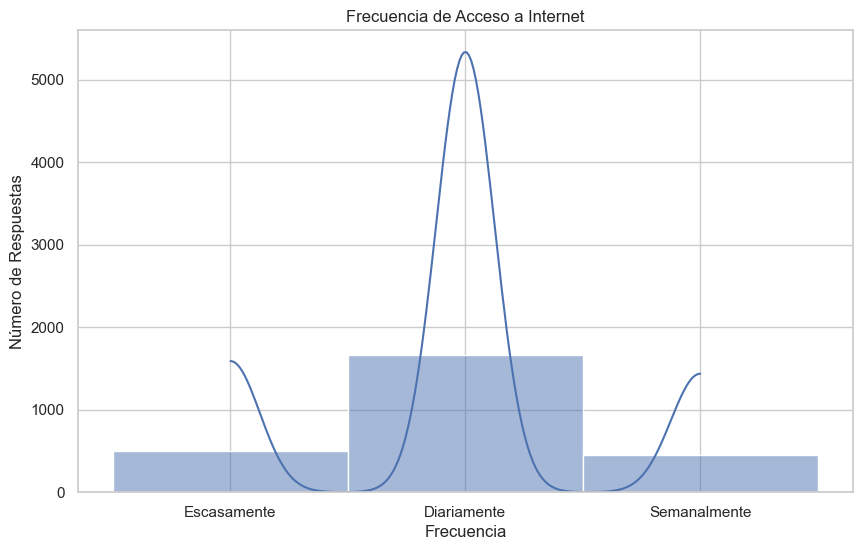

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")

# Gráfico de barras para "Edad"
plt.figure(figsize=(10, 6))
sns.countplot(data=datos, x='Edad', order=datos['Edad'].value_counts().index)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Respuestas')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para "Género"
plt.figure(figsize=(10, 6))
sns.countplot(data=datos, x='Genero', order=datos['Genero'].value_counts().index)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Número de Respuestas')
plt.show()

# Histograma de la frecuencia de acceso a Internet
plt.figure(figsize=(10, 6))
sns.histplot(datos['¿Con qué frecuencia accedes a internet?'], bins=10, kde=True)
plt.title('Frecuencia de Acceso a Internet')
plt.xlabel('Frecuencia')
plt.ylabel('Número de Respuestas')
plt.show()


In [23]:
plt.savefig('distribucion_edad.png')
plt.savefig('distribucion_genero.png')
plt.savefig('frecuencia_acceso_internet.png')


<Figure size 640x480 with 0 Axes>